### 1. Problem statement
- The Public relations department team has collected extensive data on their customers such as product reviews. 
- Based on the reviews ( in text format), the team would like to predict whether their customers are satisfied with the product or not. 
- Amazon echo review

### 2. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 3. EDA

#### 3.1 Read data

In [2]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [3]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### 3.2 Data quality review

In [6]:
reviews_df.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [7]:
reviews_df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

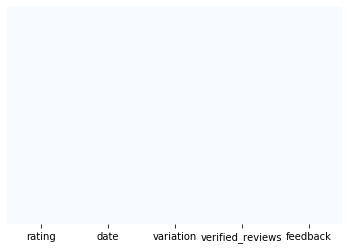

In [8]:
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

#### 3.3 Histogram distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C179385F28>,
      dtype=object)

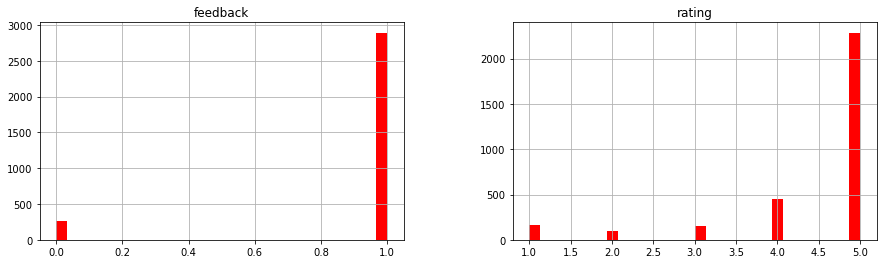

In [9]:
reviews_df.hist(bins = 30, figsize = (15, 4), color = 'r')

#### 3.4 Review length review

In [10]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [11]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


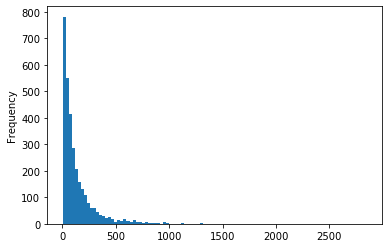

In [12]:
reviews_df['length'].plot(bins = 100, kind = 'hist')

In [13]:
reviews_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

#### 3.5 Data imbalance: imbalanced on positive feedback

In [14]:
positive = reviews_df[ reviews_df['feedback'] == 1 ]
negative = reviews_df[ reviews_df['feedback'] == 0 ]

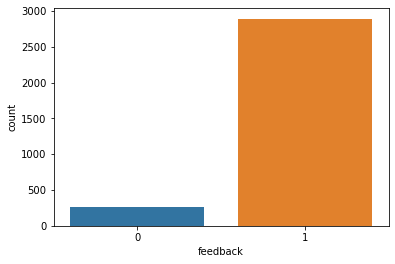

In [15]:
sns.countplot(reviews_df['feedback'], label = 'count')

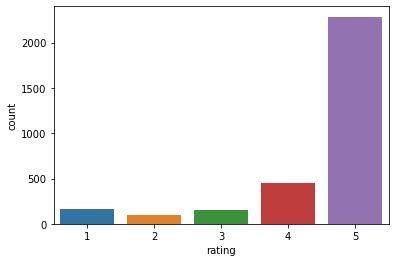

In [16]:
# sns.countplot(reviews_df['rating'], label = 'count')
sns.countplot(x = 'rating', data = reviews_df)

#### 3.6 Relation between variation and rating - no strong preference on variation

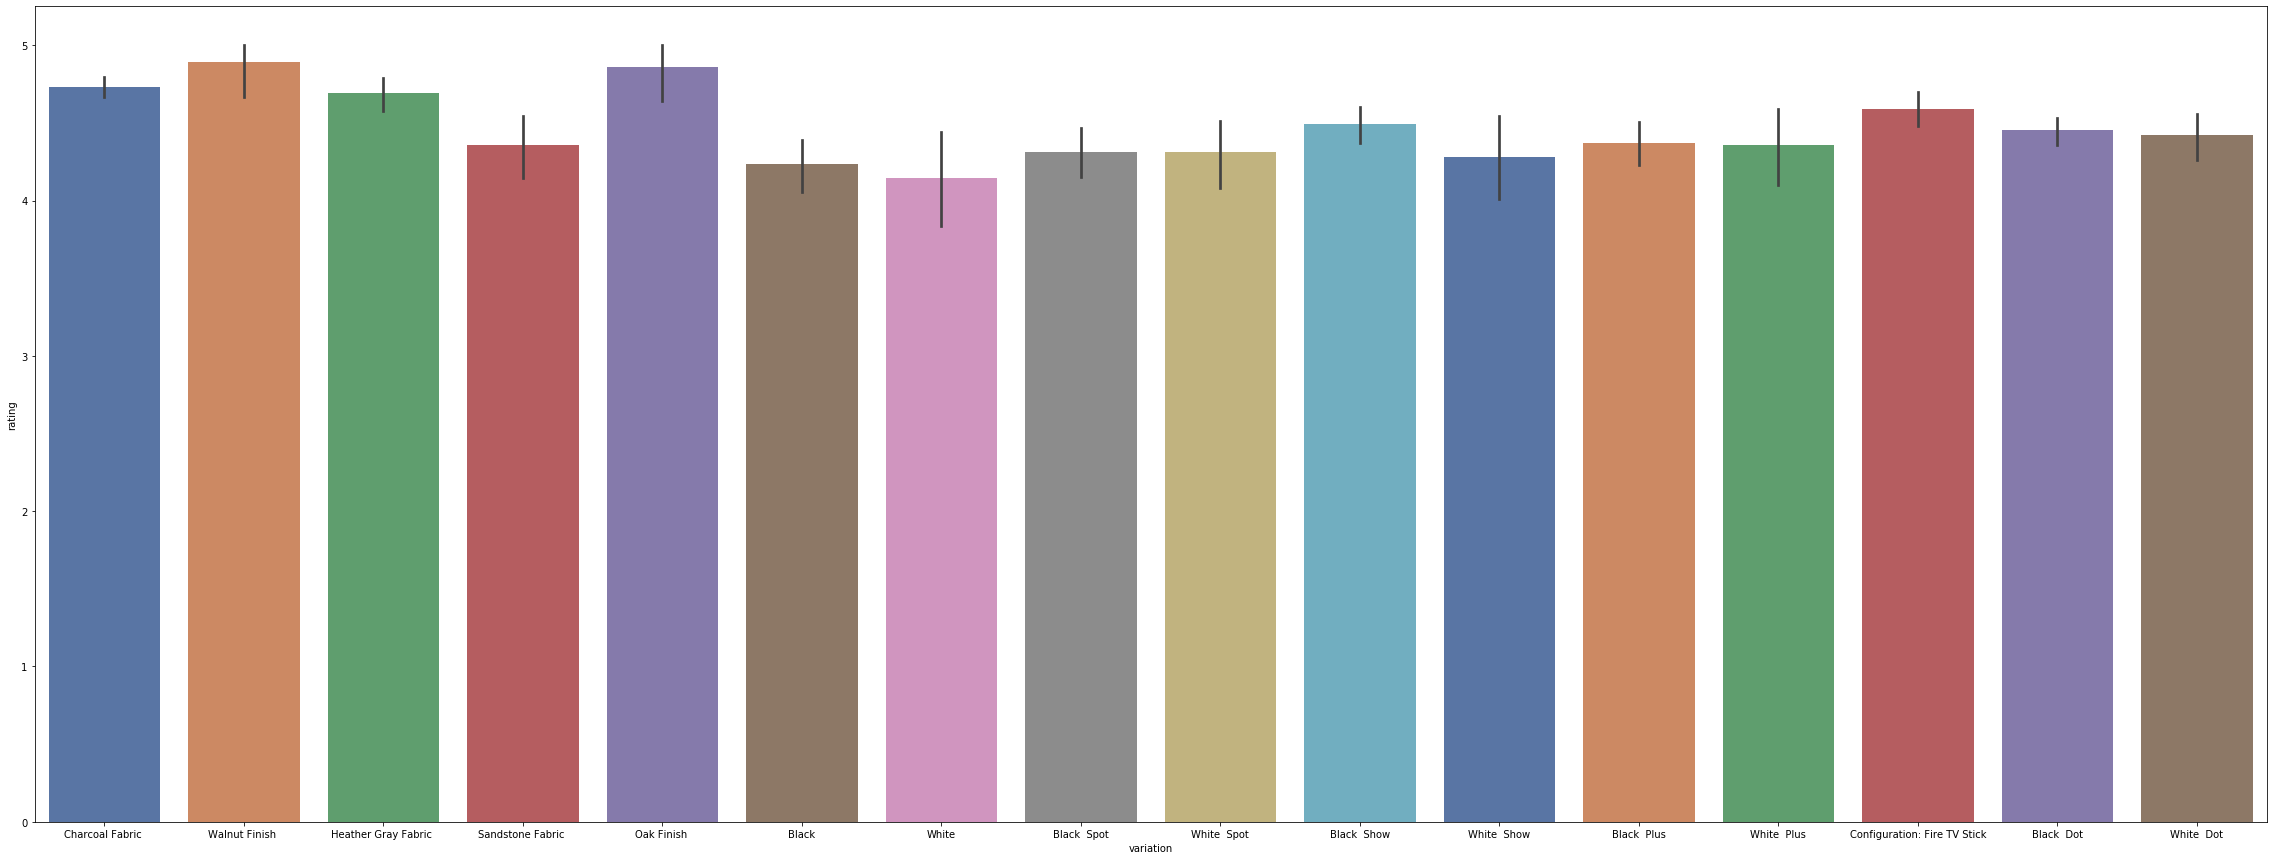

In [17]:
plt.figure(figsize = (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep')

#### 3.7 Visualize most used words

In [18]:
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_one_string = ' '.join(sentences)

In [19]:
from wordcloud import WordCloud

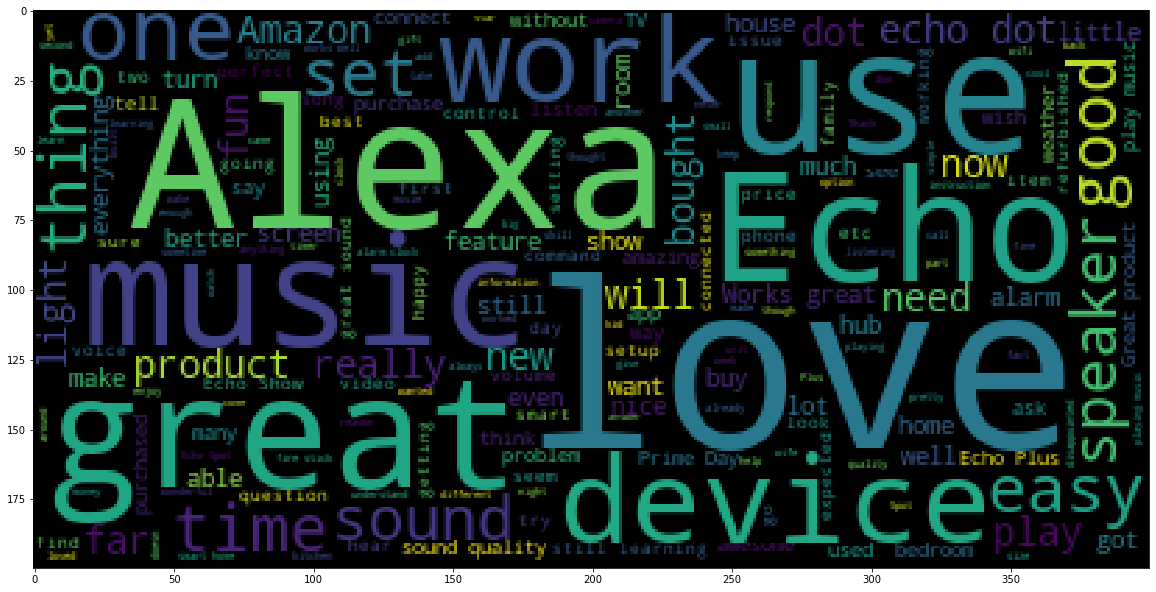

In [20]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

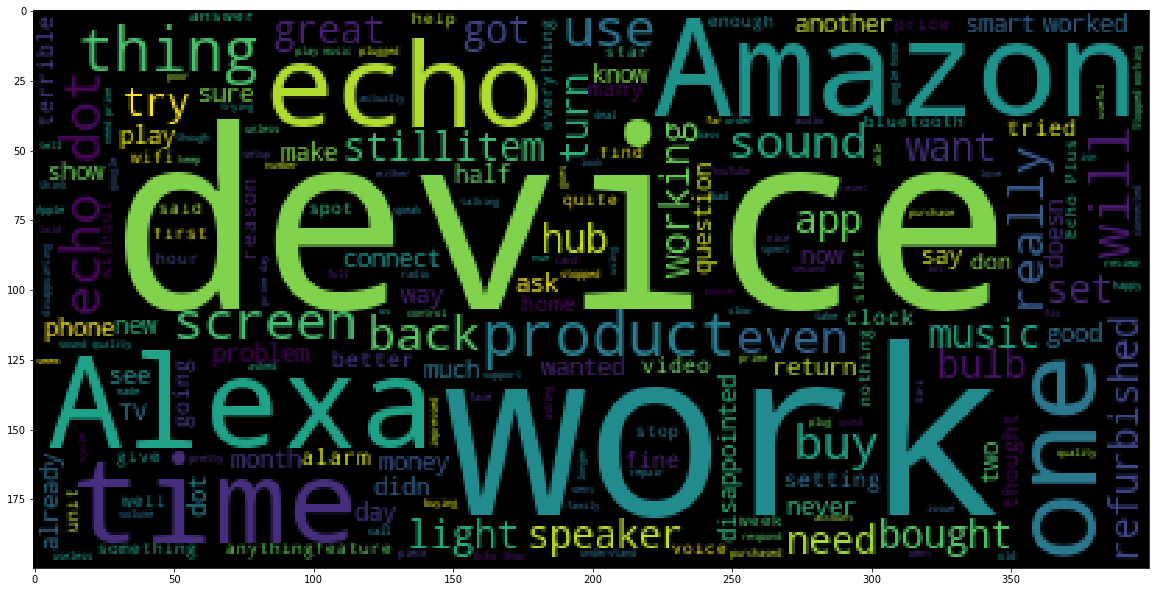

In [21]:
negative_list = negative['verified_reviews'].tolist()
negative_list_as_a_string = ' '.join(negative_list)
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(negative_list_as_a_string))

### 4. Data clean

In [22]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)

In [23]:
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [24]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first= True)

In [25]:
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [27]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis = 1)

In [28]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,I received the echo as a gift. I needed anothe...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,"Without having a cellphone, I cannot use many ...",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,I think this is the 5th one I've purchased. I'...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,looks great,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,Love it! I’ve listened to songs I haven’t hear...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
def message_clean(message):
    text_punc_removed = [char for char in message if char not in string.punctuation]
    text_punc_removed_join = ''.join(text_punc_removed)
    text_punc_removed_join_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return text_punc_removed_join_clean
    

In [30]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_clean)

In [31]:
vectorizer = CountVectorizer(analyzer = message_clean)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [32]:
reviews_countvectorizer.shape

(3150, 5211)

In [33]:
reviews_df.drop(['verified_reviews'], axis =1, inplace = True)

In [34]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [35]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [36]:
X = reviews_df.drop(['feedback'], axis = 1)
y = reviews_df['feedback']

### 5. Train & Evaluate Naive Bayes classifier

In [37]:
X.shape

(3150, 5226)

In [38]:
y.shape

(3150,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [41]:
y_pred = nb_classifier.predict(X_test)

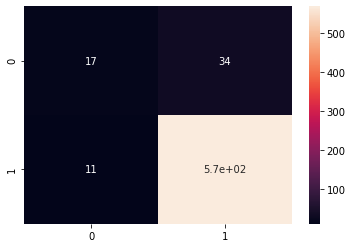

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.33      0.43        51
           1       0.94      0.98      0.96       579

    accuracy                           0.93       630
   macro avg       0.78      0.66      0.70       630
weighted avg       0.92      0.93      0.92       630



### 6. Train & Evaluate Logistic Regression classifier

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
print('Accuracy: {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 93.33333333333333 %


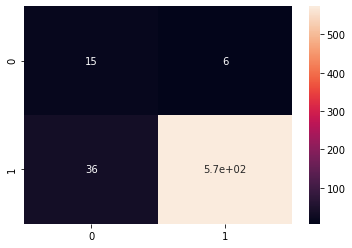

In [46]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.29      0.42        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.83      0.64      0.69       630
weighted avg       0.92      0.93      0.92       630

